
# Team Members : 
**- HERGI DIANGUE**

**- LEVIS JUNIOR**

# Mini-Projet : Prédiction des Prix des Diamants avec AdaBoost



Dictionary 

Unnamed: 0: Index or identifier (not useful for analysis).

carat: Weight of the diamond (in carats).

cut: Quality of the cut (Fair, Good, Very Good, Premium, Ideal).

color: Diamond color (D to J, D being the best).

clarity: Diamond clarity (IF, VVS1, VVS2, VS1, VS2, SI1, SI2, I1).

depth: Total depth percentage.

table: Width of the table (top surface) as a percentage.

price: Price of the diamond (in dollars).

x: Length of the diamond (in mm).

y: Width of the diamond (in mm).

z: Height of the diamond (in mm).


Objectives
Apply AdaBoost on a dataset (Diamonds dataset).
Perform Exploratory Data Analysis (EDA).
Preprocess the data to improve performance.
Build and evaluate an AdaBoost regression model.
Dataset
Diamonds dataset provided by Seaborn.
Main features: carat, cut, color, clarity, price, etc.
Preprocessing, Visualizations, and AdaBoost Model
In this section, we include:

Data cleaning and preprocessing.
Visualizations of the features and performance.
Training and evaluation of an AdaBoost model.


# Importing Libraries

In [1]:
import scipy
import sklearn
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler


In [3]:
# Chargement des données
file_path = "diamonds.csv"  # Assurez-vous d'avoir ce fichier dans le répertoire courant
diamonds = pd.read_csv(file_path)

# Aperçu des données
diamonds.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


# Data Acces

In [6]:
diamonds.sample(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
11082,11083,1.15,Ideal,I,SI1,62.3,57.0,4925,6.74,6.67,4.18
1689,1690,0.76,Ideal,E,SI1,62.5,57.0,3033,5.80,5.82,3.63
3160,3161,0.95,Very Good,H,SI2,59.0,59.0,3335,6.38,6.51,3.77
46514,46515,0.51,Ideal,H,VS1,61.2,55.0,1780,5.17,5.19,3.17
27715,27716,0.36,Premium,E,SI2,60.6,59.0,648,4.61,4.57,2.78


In [8]:
diamonds.price.describe()

count    53940.000000
mean      3932.799722
std       3989.439738
min        326.000000
25%        950.000000
50%       2401.000000
75%       5324.250000
max      18823.000000
Name: price, dtype: float64


## Handling Missing Values
We replace missing values with the median of the corresponding columns.

In [12]:
# Afficher les valeurs manquantes avant traitement
("Missing values before processing:")
diamonds.isnull().sum()

# Séparer les colonnes numériques et non numériques
numeric_columns = diamonds.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = diamonds.select_dtypes(include=['object']).columns

# Remplacement des valeurs manquantes dans les colonnes numériques par la médiane
diamonds[numeric_columns] = diamonds[numeric_columns].fillna(diamonds[numeric_columns].median())

# Remplacement des valeurs manquantes dans les colonnes catégoriques par le mode
for col in categorical_columns:
    diamonds[col].fillna(diamonds[col].mode()[0], inplace=True)



/var/folders/28/9wblcqh12kb8m10jvtft5c3w0000gn/T/ipykernel_9273/3449939505.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  diamonds[col].fillna(diamonds[col].mode()[0], inplace=True)


In [14]:

# Afficher les valeurs manquantes après traitement
("Missing values after processing:")
diamonds.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64


## Step 2: Identification and Handling of Outliers
We use the Interquartile Range (IQR) to detect and remove outliers from the numerical columns.

In [18]:

# Suppression des valeurs aberrantes (outliers)
numerical_cols = ['carat', 'depth', 'table', 'x', 'y', 'z']

for col in numerical_cols:
    Q1 = diamonds[col].quantile(0.25)
    Q3 = diamonds[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    diamonds = diamonds[(diamonds[col] >= lower_bound) & (diamonds[col] <= upper_bound)]



In [20]:
("Data Dimensions After Outlier Removal :", diamonds.shape)


('Data Dimensions After Outlier Removal :', (48898, 11))


## Step 3: Standardization of Numerical Data
We standardize the numerical columns so that all features are on a similar scale.

In [23]:
# Standardizing the numerical columns
scaler = StandardScaler()
diamonds[numerical_cols] = scaler.fit_transform(diamonds[numerical_cols])

print("Preview of standardized diamonds:")
print(diamonds[numerical_cols].head())


Preview of standardized diamonds:
      carat     depth     table         x         y         z
0 -1.269961 -0.278232 -1.120269 -1.618366 -1.602757 -1.636615
1 -1.319820 -1.854592  1.863194 -1.676768 -1.739789 -1.825467
3 -1.120386  0.556311  0.371462 -1.375026 -1.358056 -1.321860
4 -1.070528  1.390855  0.371462 -1.238755 -1.240600 -1.133008
5 -1.245032  0.927219 -0.125781 -1.628100 -1.622333 -1.557926



## Step 4: Data Visualization
Let's visualize the distribution of prices and the relationships between the features.

Columns used for correlation: Index(['carat', 'depth', 'table', 'price', 'x', 'y', 'z'], dtype='object')


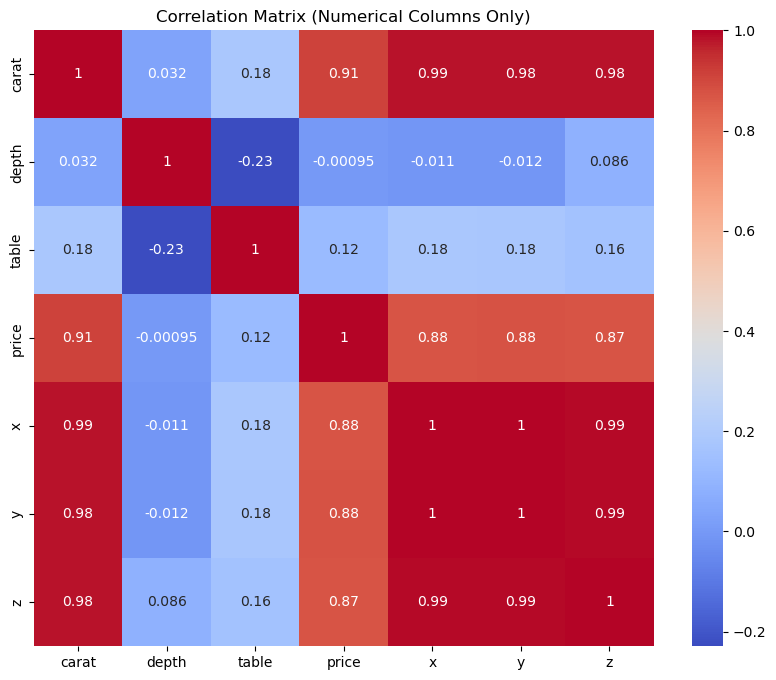

In [26]:
# Select only numerical columns for the correlation matrix
numeric_columns = diamonds.select_dtypes(include=['float64', 'int64'])

# Exclude 'Unnamed: 0' if it exists, as it's not relevant for correlation
if 'Unnamed: 0' in numeric_columns.columns:
    numeric_columns = numeric_columns.drop(columns=['Unnamed: 0'])

# Check the selected columns
print("Columns used for correlation:", numeric_columns.columns)

# Generate the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_columns.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix (Numerical Columns Only)')
plt.show()


# Interprétation 

Carat and price have a strong correlation (0.91), meaning that the higher the weight, the higher the price. In contrast, depth and price have almost no correlation (-0.00095), 




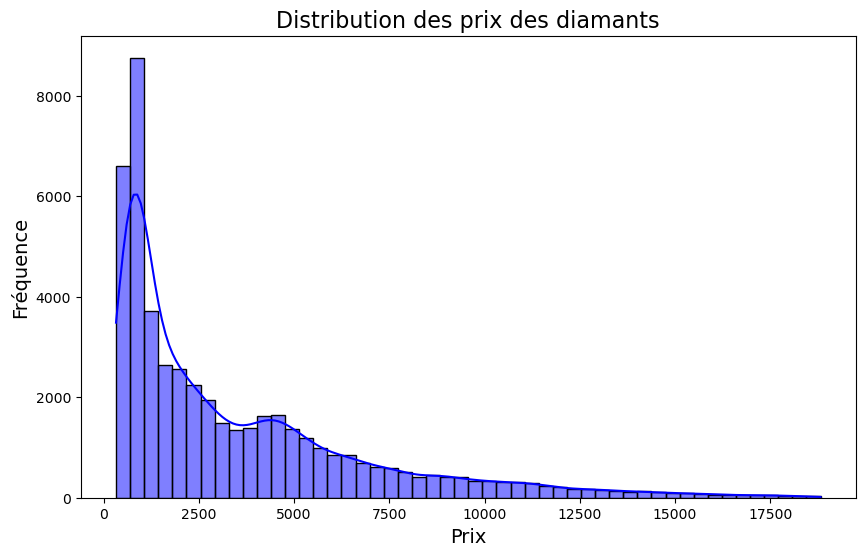

In [29]:

# Distribution des prix
plt.figure(figsize=(10, 6))
sns.histplot(diamonds['price'], bins=50, kde=True, color='blue')
plt.title("Distribution des prix des diamants", fontsize=16)
plt.xlabel("Prix", fontsize=14)
plt.ylabel("Fréquence", fontsize=14)
plt.show()



# Interpretation:

his chart shows how diamond prices are distributed. Most diamonds cost less than 2,500, as shown by the big peak at the beginning. After that, the number of diamonds decreases as prices rise. A few diamonds are very expensive, up to 17500, but these are rare. The shape shows a majority of low prices, with a queue stretching towards the higher prices.







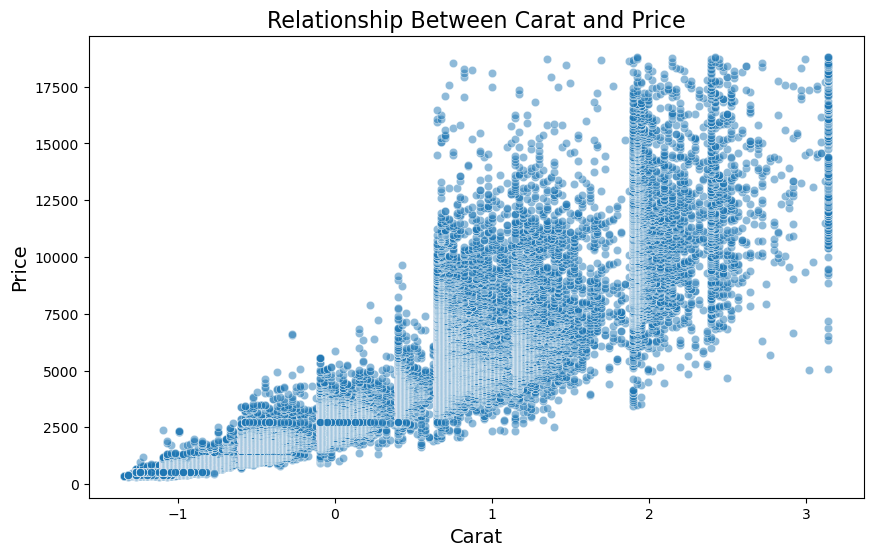

In [32]:
# Relationship between carat and price
plt.figure(figsize=(10, 6))
sns.scatterplot(x=diamonds['carat'], y=diamonds['price'], alpha=0.5)
plt.title("Relationship Between Carat and Price", fontsize=16)
plt.xlabel("Carat", fontsize=14)
plt.ylabel("Price", fontsize=14)
plt.show()

# Interpretation:
There's a general tendency for the points to rise, indicating a positive relationship. However, for the same weight, prices can vary, probably due to other criteria such as quality. Some carat values are less common, creating gaps between the points.








## Step 5: AdaBoost Model
We train an AdaBoost model to predict the price of diamonds.








In [36]:
from sklearn.preprocessing import LabelEncoder

# Initialiser un encodeur
label_encoder = LabelEncoder()

# Encoder chaque colonne catégorique
for col in ['cut', 'color', 'clarity']:
    diamonds[col] = label_encoder.fit_transform(diamonds[col])


In [38]:
from sklearn.preprocessing import LabelEncoder

# Initialiser un encodeur
label_encoder = LabelEncoder()

# Encoder chaque colonne catégorique
for col in ['cut', 'color', 'clarity']:
    diamonds[col] = label_encoder.fit_transform(diamonds[col])


In [40]:
# Séparation des données
X = diamonds.drop('price', axis=1)
y = diamonds['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [42]:
# Initialisation et entraînement du modèle AdaBoost
base_model = DecisionTreeRegressor(max_depth=3)
adaboost = AdaBoostRegressor(base_model, n_estimators=100, learning_rate=0.1, random_state=42)
adaboost.fit(X_train, y_train)


AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=3),
                  learning_rate=0.1, n_estimators=100, random_state=42)

In [45]:
# Predictions and evaluation
y_pred = adaboost.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r2:.2f}")


Mean Squared Error (MSE): 285282.94
R-squared (R²): 0.98


# Interpretation:
The AdaBoost Regressor model performed very well, with an R² of 0.98, explaining 98% of the data variance, and an MSE of 285,282.94, demonstrating low mean error and high prediction accuracy.
However, to guarantee its robustness and generalizability, several points deserve particular attention:
Independent validation: Test the model on an independent dataset to ensure that it is not affected by overfitting.
Analysis of important variables: Identify key features influencing predictions to better understand underlying relationships.
Optimization of hyperparameters: Adjust parameters such as the number of estimators or the learning rate to improve the balance between accuracy and generalization.
In conclusion, the model provides a solid basis for meeting the objectives, but further validation and optimization are required to guarantee even more robust performance, adapted to a variety of contexts


In [48]:
from sklearn.metrics import mean_squared_error, r2_score

# Calcul de la RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print(f"RMSE : {rmse:.4f}")
print(f"R² : {r2:.4f}")


RMSE : 534.1188
R² : 0.9755


# Interpretation:
RMSE: 534.1188 : On average, model forecasts deviate from actual diamond prices by around 1,315.77 price units. This gives a clear idea of the typical forecast error at the same scale as the target variable ( price).

R²: 0.9755: The model explains 97.55% of the variance in diamond prices, indicating good predictive performance. The remaining 10.89% of variance is due to factors not taken into account by the model, suggesting room for improvement.


Translated with DeepL.com (free version)


## Étape 6 : Visualisation des performances
Visualisons les prédictions par rapport aux valeurs réelles.


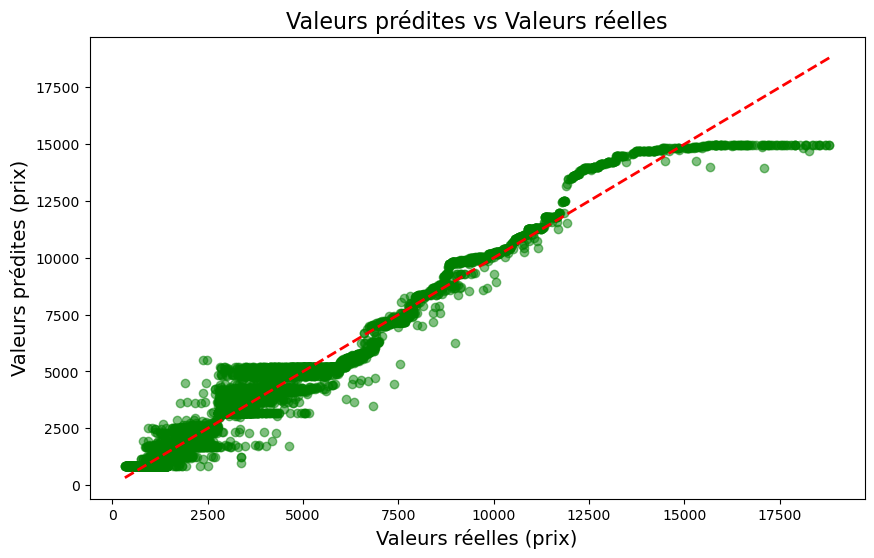

In [52]:

# Scatter plot des prédictions vs valeurs réelles
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title("Valeurs prédites vs Valeurs réelles", fontsize=16)
plt.xlabel("Valeurs réelles (prix)", fontsize=14)
plt.ylabel("Valeurs prédites (prix)", fontsize=14)
plt.show()


In [54]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

# Modèle de base
base_model = DecisionTreeRegressor(max_depth=2)

# Définir les hyperparamètres à tester
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.5],
    'estimator__max_depth': [2, 3, 4]  # Ajouter des paramètres pour l'estimator
}

# Configuration de GridSearchCV
grid_search = GridSearchCV(
    estimator=AdaBoostRegressor(estimator=base_model, random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error'
)

# Entraîner le GridSearchCV
grid_search.fit(X_train, y_train)

# Résultats
print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_


Best Parameters: {'estimator__max_depth': 4, 'learning_rate': 0.5, 'n_estimators': 100}


# 

GridSearchCV to find the best parameters of an AdaBoostRegressor model.

It tests several combinations of hyperparameters, such as:

The number of trees ( n_estimators: 50, 100, 150),
The learning rate ( learning_rate: 0.01, 0.1, 0.5),
The depth of the trees ( max_depth: 2, 3, 4).
Cross-validation (5 folds) is used to evaluate each combination and identify the one that gives the best performance according to the mean squared error.

At the end, we get the best parameters and the best model configured with these parameters to make more accurate predictions.


**In conclusion, our AdaBoostRegressor model has an R² of 0.98, indicating an MSE of 285282.94, showing**